# Logistic Regression

Logistic Regression is used to estimate the probability of belonging the sample to specific class.

In [196]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
np.random.seed(42)

Let's use already prepared breast cancer data from sklearn datasets.

In [198]:
breast_cancer = datasets.load_breast_cancer()

In [199]:
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

Separate the data. For prediction only one feature will be used - mean radius.

In [200]:
X = breast_cancer['data'][:, 0].reshape(-1, 1)

In [201]:
y = breast_cancer['target']

Simpler way to load already separated data.

In [202]:
# X, y = datasets.load_breast_cancer(return_X_y=True)

Split the data into train set and test set.

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Fit the logistic regression model.

In [204]:
log_r = LogisticRegression(max_iter=2500)
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=2500)

Predict the values.

In [205]:
y_pred = log_r.predict(X_test)

In [206]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [207]:
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

Accuracy of the predictions.

In [208]:
np.sum(y_pred == y_test)/y_test.shape[0]

0.9090909090909091

Predict and return probability of each target class.

In [209]:
y_proba = log_r.predict_proba(X_test)

In [210]:
y_proba[:5]

array([[0.10242158, 0.89757842],
       [0.97893425, 0.02106575],
       [0.64715279, 0.35284721],
       [0.09659709, 0.90340291],
       [0.04589581, 0.95410419]])

Plot the results.

Text(14.7, 0, 'Decision Boundary')

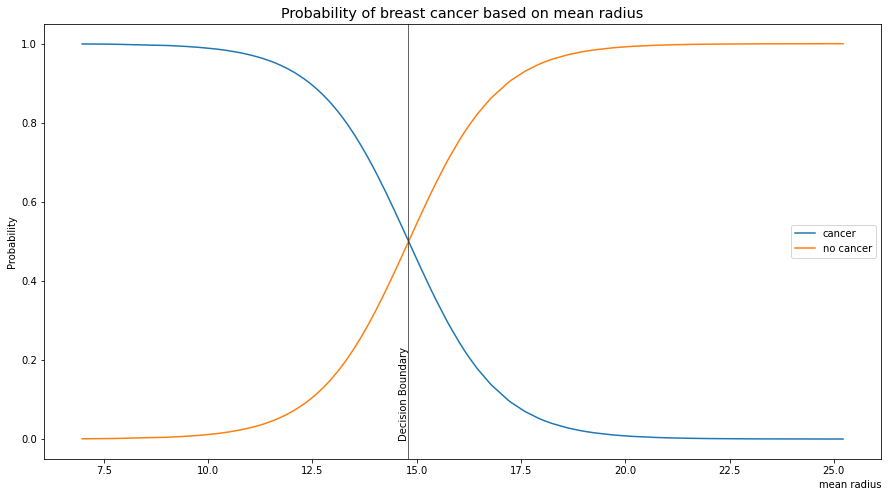

In [211]:
plt.figure(figsize=(15, 8))
plt.title(f"Probability of breast cancer based on {breast_cancer['feature_names'][0]}", size='x-large')
sns.lineplot(x=X_test[:, 0], y=y_proba[:, 1], label='cancer')
sns.lineplot(x=X_test[:, 0], y=y_proba[:, 0], label='no cancer')
plt.ylabel('Probability')
plt.xlabel(breast_cancer['feature_names'][0], loc='right')
plt.axvline(x=14.804, color='Black', linewidth=0.6)
plt.text(14.7, 0, 'Decision Boundary', ha='center', rotation=90)